In [57]:
link_data = '../trainingSet'
link_model = '../model'

In [58]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2

tf.random.set_seed(42)

In [59]:
class Training:
    def __init__(self, data_link, model_link):
        self.data_link = data_link
        self.model_link = model_link
    def total_image(self):
        total = 0
        for label in os.listdir(self.data_link):
            total += len(os.listdir(os.path.join(self.data_link, label)))
        return total
    def show_inp(self, label, img):
        plt.subplot(3, 4, int(label)+1)
        plt.title(f"Label: {label}")
        plt.imshow(img, cmap="gray")

    def prepare_data(self):
        self.x, self.y = [], []
        total = self.total_image()
        labels = os.listdir(self.data_link)
        plt.figure(figsize=(8, 7))
        I = np.eye(len(labels))
        with tqdm(total=total, desc="Loading images") as pbar:
            for label in labels:
                # i = 0   
                image_names = os.listdir(os.path.join(self.data_link, label))
                for name in image_names:
                    img_path = os.path.join(self.data_link, label, name)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)/255.0
                    img = cv2.resize(img, (28, 28))
                    img = np.expand_dims(img, axis=-1)

                    self.x.append(img)
                    self.y.append(I[int(label)])

                    pbar.update(1)
                self.show_inp(label, img)
        self.x = np.array(self.x)
        self.y = np.array(self.y)
        print(f'X shape: {self.x.shape}, Y shape: {self.y.shape}')
    def split_data(self):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2, random_state=42)
        print(f'Train shape: {self.x_train.shape}, {self.y_train.shape}, Test shape: {self.x_test.shape}, {self.y_test.shape}')
    def prepare_train(self):
        self.model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ])
        self.model.compile(
            optimizer=Adam(learning_rate=0.001), 
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
    def train(self, epochs=10, batch_size=32):
        self.history = self.model.fit(
            self.x_train, 
            self.y_train, 
            epochs=epochs, 
            batch_size=batch_size,
            validation_split=0.2,
            shuffle=True
        )

        


Loading images:   0%|          | 0/42000 [00:00<?, ?it/s]

Loading images: 100%|██████████| 42000/42000 [05:45<00:00, 121.43it/s]


X shape: (42000, 28, 28, 1), Y shape: (42000, 10)


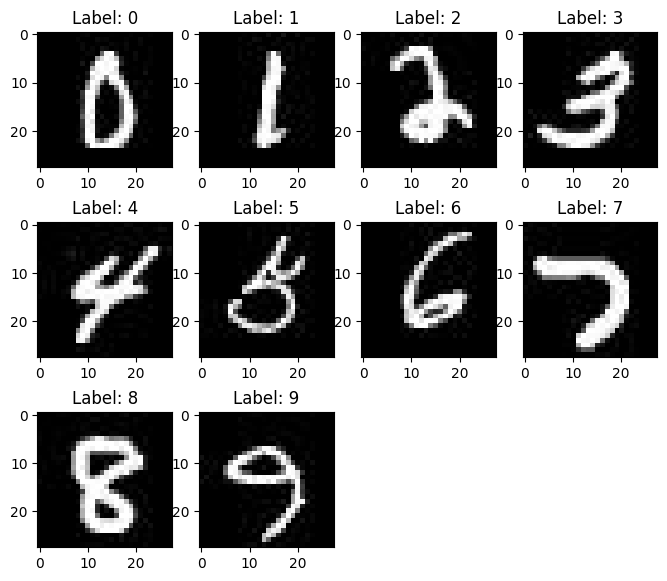

In [60]:
train = Training(link_data, link_model)
train.prepare_data()


In [61]:
train.split_data()

Train shape: (33600, 28, 28, 1), (33600, 10), Test shape: (8400, 28, 28, 1), (8400, 10)


In [64]:
train.prepare_train()
train.train(epochs=15, batch_size=40)

Epoch 1/15


c:\Users\nhann\.conda\envs\env1\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


672/672 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7837 - loss: 0.6812 - val_accuracy: 0.9723 - val_loss: 0.0886
Epoch 2/15
672/672 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9606 - loss: 0.1278 - val_accuracy: 0.9817 - val_loss: 0.0654
Epoch 3/15
672/672 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9726 - loss: 0.0871 - val_accuracy: 0.9848 - val_loss: 0.0555
Epoch 4/15
672/672 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9774 - loss: 0.0721 - val_accuracy: 0.9848 - val_loss: 0.0537
Epoch 5/15
672/672 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9815 - loss: 0.0613 - val_accuracy: 0.9842 - val_loss: 0.0549
Epoch 6/15
672/672 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9843 - loss: 0.0499 - val_accuracy: 0.9853 - val_loss: 0.0527
Epoch 7/15
672/672 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9869 - loss: 0.0419 - val_accuracy: 0.9862 - val_loss: 0.0516
Epoch 8/15
672/672 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9877 - loss: 0.0368 - val_accuracy: 0.9876 - val_

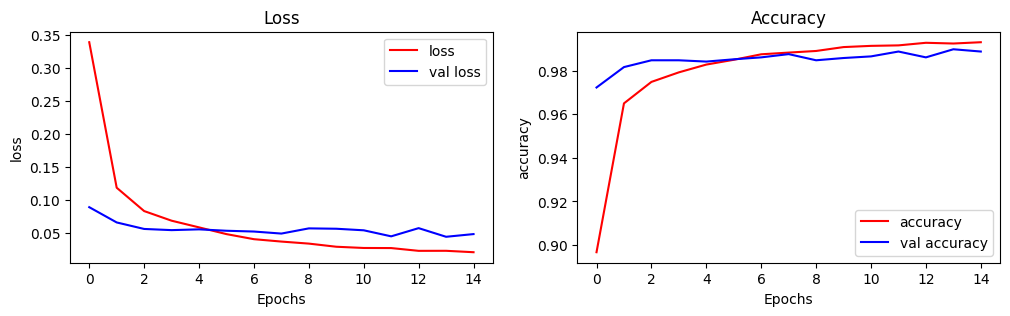

In [65]:
loss = train.history.history['loss']
val_loss = train.history.history['val_loss']

accuracy = train.history.history['accuracy']
val_accuracy = train.history.history['val_accuracy']

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(loss, color='r', label='loss')
plt.plot(val_loss, color='b', label='val loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(accuracy, color='r', label='accuracy')
plt.plot(val_accuracy, color='b', label='val accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


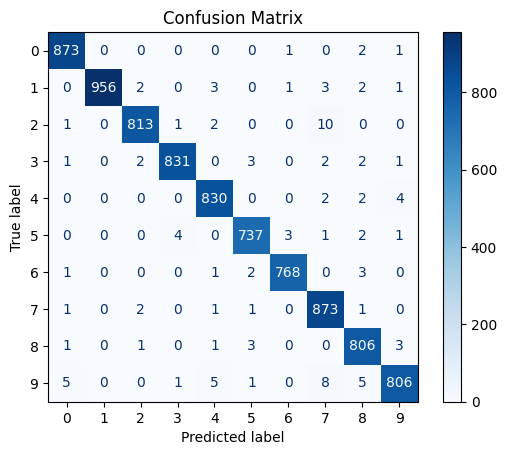

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = np.argmax(train.model.predict(train.x_test), axis=-1)
true_labels = np.argmax(train.y_test, axis=-1)
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix")
plt.show()

In [67]:
train.model.save(os.path.join(train.model_link, 'model.h5'))